Name

Labpartner(s)

In [ ]:
#import statements go here

# Class 10.1

# Warmups 10.1

If you do not complete the warmup during the class period, complete for homework and review/expand for weekly practice. These are basic coding skills you need to be comfortable with. Work on the following for 25 min and then we will go over them together:

**W.1** Write a function that given two numbers returns the maximum. Figure out the maximum number using logical control (no pre-made max functions)

In [1]:
def warmup(n1,n2):
    if n1>n2:
        return(n1)
    elif n1<n2:
        return(n2)
    else:
        print('values even')

In [6]:
warmup(33,33)

values even


**W.2** Modify the function we developed in Lab. 9.2 W.1 to return n consective even integers

In [3]:
def w1(n):
    x=2
    y=[]
    t=1
    while t<=n:
        y.append(x)
        x=x+2
        t=t+1
    return(y)
        

In [5]:
w1(23)

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46]

# Lecture 10.1

### Agenda:
- Announcements
    - changes in gradiing proccess, deadlines
    - Done with datacamp
- Shoutouts for good work (Paola, Luz)
- Lab 7.2 review
- Cartopy
- Movies (with Victoria Garza)


#### Announcements

Because my health has improved since the beginning of the term, and as we move into the more advanced material, I am taking over the grading from Adrian. Join me in thanking him for his assistance to us all in a time of need. I am working on catching up on the grading now and will finish this next week. So check your grades for updates and to see if you need to redo anything. I have added my research assistant and scientific programmer Victoria Garza to slack. She is available to you all for questions as we move into the advanced material.

I did go back and re-grade some labs (4.2 in particular) as I noted they were missing some material. Please see my notes if your grade changed and submit the missing material.

Previously I mentioned that no late labs will be accepted after 4/15, at which time you all will be working on your final projects. **Further, all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by 4/1 to pass the class.** Reminder thet the last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

We are done with datacamp! (But feel free to use it as a resource as you like)

#### Shoutouts

- Paola is student of the week for all of her excellent work, well done! 
- Luz did a great job on her CV, very creative.


### Main Lecture

#### Motivation: making nice maps and animating data are great skills for scientists to engage audiences with our results, but also to better understand the systems we are studying. 

Examples:
- Gulf of Mexico sattellite data animation
- Animation from recent SEEMS seminar speaker Dr. Scott James from Baylor


#### 7.2 Review
Today we are building on what we did in Lab 7.2, which was using xarray to plot ocean model output. The vast majority of you did not complete this lab satisfactorily, which probably had something to do with it being the week after the freeze.

Since the url I used before is no longer valid, I'm going to use the netcdf subset option on the HYCOM website, which also lets me get a subset of the data (and thus a smaller file). See https://www.hycom.org/data/gomu0pt04/expt-90pt1m000 data access button

In [1]:
file = '2021.nc4'

In [1]:
import xarray as xr

In [3]:
ssh_data = xr.open_dataset(file, decode_times=False)

In [4]:
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.861e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

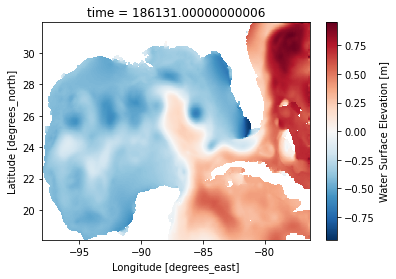

In [5]:
ssh_data.surf_el.plot()

#### Cartopy https://scitools.org.uk/cartopy/docs/latest/

Now let's make a nice plot using Catopy

In [2]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import matplotlib.pyplot as plt

There are a number of differnt map projections available in Cartopy.  

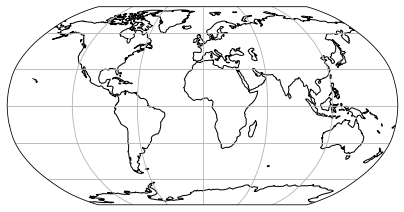

In [10]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

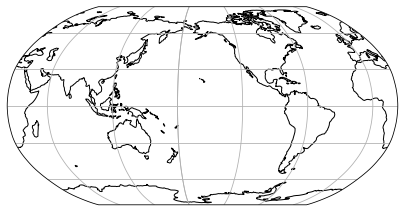

In [11]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the emap
ax.coastlines(resolution='110m')
ax.gridlines()

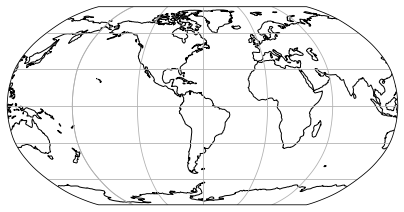

In [12]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
ax.coastlines(resolution='110m')
ax.gridlines()

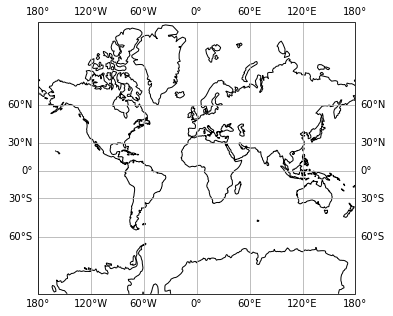

In [14]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

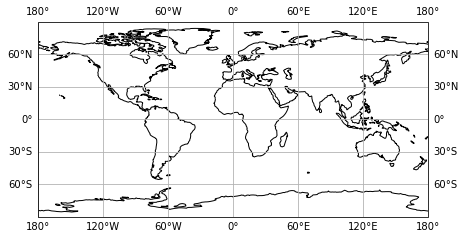

In [13]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

Let's zoom into the Gulf of Mexico. We want to set the lat and lon range to match our HYCOM data. How do we find this?

In [19]:
ssh_data.lat.min()

<xarray.DataArray 'lat' ()>
array(18.12000084)

In [20]:
ssh_data.lon.min()

<xarray.DataArray 'lon' ()>
array(-98.)

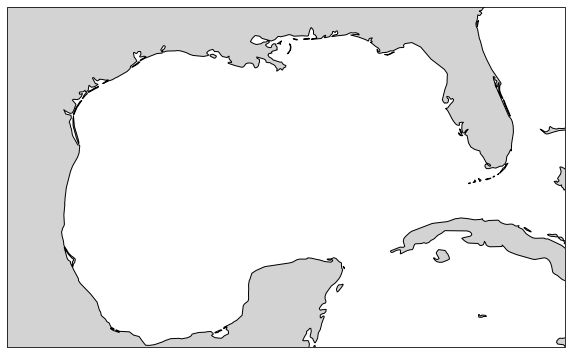

In [23]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

In [17]:
# what does our data look like again?
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.861e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

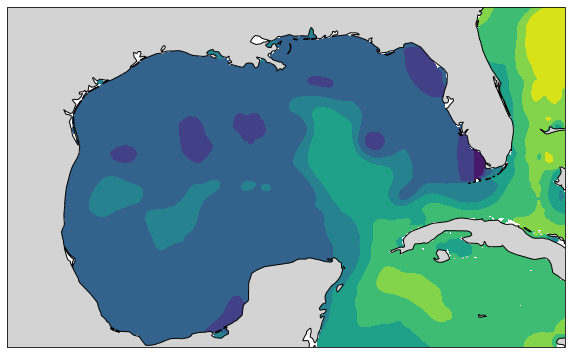

In [24]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = ssh_data.lon
y = ssh_data.lat
var = ssh_data.surf_el[0,:,:] 

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in.

#### Making Movies demo by Victoria 
(also see ppt slides in github)

# Lab 10.1

**E.1** Pick two of the examples in the Cartopy gallery (https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and go through the code. Make three modifications for each of the two examples and document what you did.

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
import numpy as np

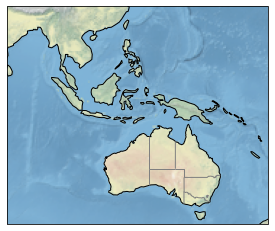

In [18]:

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())
    # Put a background image on for nice sea rendering.
    ax.stock_img()
    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='gray')
    plt.show()
if __name__ == '__main__':
    main()

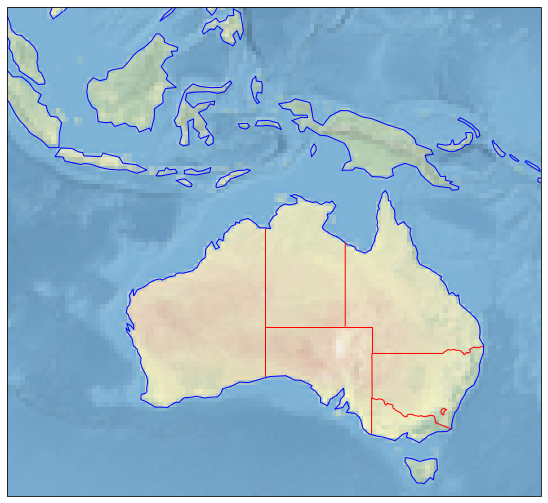

In [28]:
def main():
    fig = plt.figure(figsize=(16,9))#increased figure size
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([100, 160, -45, 10], crs=ccrs.PlateCarree()) #changed extent
    ax.stock_img()
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE, edgecolor='blue') #changed coast color
    ax.add_feature(cfeature.RIVERS)# added rivers
    ax.add_feature(states_provinces, edgecolor='red') #changed border color
    plt.show()
if __name__ == '__main__':
    main()

In [33]:
from cartopy.feature.nightshade import Nightshade
import datetime

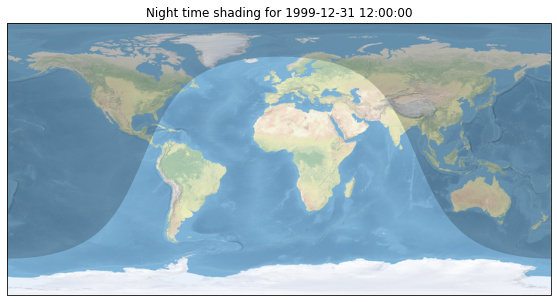

In [41]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

date = datetime.datetime(1999, 12, 31, 12)

ax.set_title('Night time shading for {}'.format(date))
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.2))
plt.show()

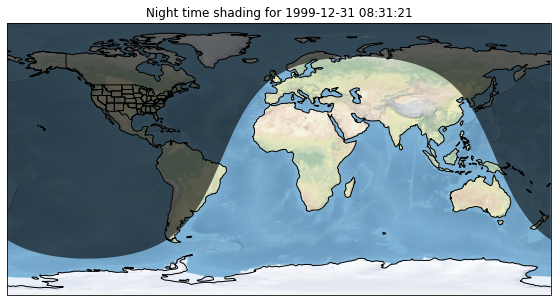

In [47]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

date = datetime.datetime(1999, 12, 31, 8, 31, 21) #changed time and added minutes and second
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES) #added coastline and states
ax.set_title('Night time shading for {}'.format(date))
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.6)) #darkened nightshade
plt.show()

**E.2** Download and plot HYCOM sea surface temperature for two diferent days (perhaps different seasons or sequential days, up to you) using cartopy. Add a grid, lat/lon labels, and annotate by adding a marker of the city/town you are living in. Make sure you adjust the colorbar to be a good fit to the data.


In [6]:
e1= '2021 (1).nc4'

In [8]:
sst_data1 = xr.open_dataset(e1, decode_times=False)

In [25]:
sst_data1

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.851e+05
  * depth       (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

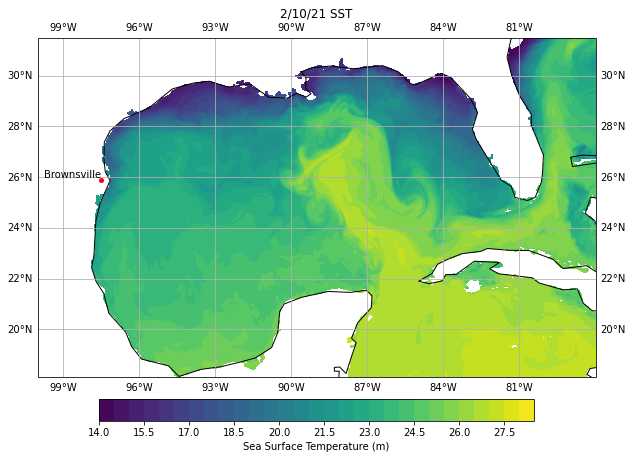

In [40]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.title('2/10/21 SST')
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 26, 'Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
x = sst_data1.lon
y = sst_data1.lat
var = sst_data1.water_temp[0,0,:,:]
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, .5)) 
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")

In [36]:
e2= '2021 (2).nc4'

In [37]:
sst_data2 = xr.open_dataset(e2, decode_times=False)

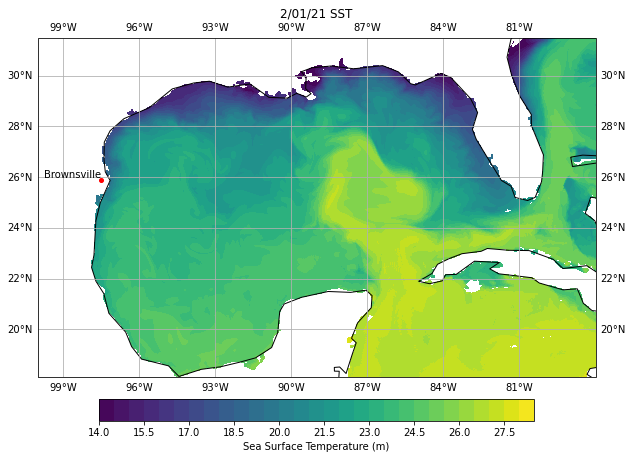

In [39]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.title('2/01/21 SST')
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 26, 'Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
x = sst_data2.lon
y = sst_data2.lat
var = sst_data2.water_temp[0,0,:,:]
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, .5)) 
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")

**E.3** Animate some data. Using Davinci or the movie software of your choice, create an animated plot. This can be of any data you like. Put the code you used to plot here, and upload the resulting movie file to github.

You will demonstrate your animation to the class next Monday.

In [27]:
import matplotlib.animation as ani
import pandas as pd

In [133]:
e3 = pd.read_csv('rodents_20210212_v2.csv', index_col=0)

In [134]:
e3_pivot=e3.pivot_table('# of Individuals', index=('Day','Camera'), columns='Species')

In [135]:
e3_pivot=e3_pivot.fillna(0)

In [136]:
e3_pivot

Species     Chaetodipus_hispidus  Neotoma_micropus  Onychomys_leucogaster  \
Day Camera                                                                  
5   2NF                      0.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     1.0               0.0                    0.0   
    DC02                     0.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               0.0                    0.0   
6   2NF                      1.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     1.0               0.0                    0.0   
    DC02                     1.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               0.0                    0.0   
7   2NF                      1.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     1.0               0.0                    0.0   
    DC02                     0.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               1.0                    0.0   
8   2NF                      1.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     1.0               0.0                    0.0   
    DC02                     1.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               0.0                    0.0   
9   2NF                      1.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     1.0               0.0                    0.0   
    DC02                     0.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               0.0                    0.0   
10  2NF                      1.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     0.0               0.0                    1.0   
    DC02                     0.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               0.0                    0.0   
11  2NF                      1.0               0.0                    0.0   
    2SF                      0.0               0.0                    0.0   
    2SN                      0.0               0.0                    0.0   
    DC01                     1.0               0.0                    0.0   
    DC02                     0.0               0.0                    0.0   
    FC01                     0.0               0.0                    0.0   
    WG03                     0.0               1.0                    0.0   
12  2NF                      0.0               0.0                    0.0

<Figure size 432x288 with 0 Axes>

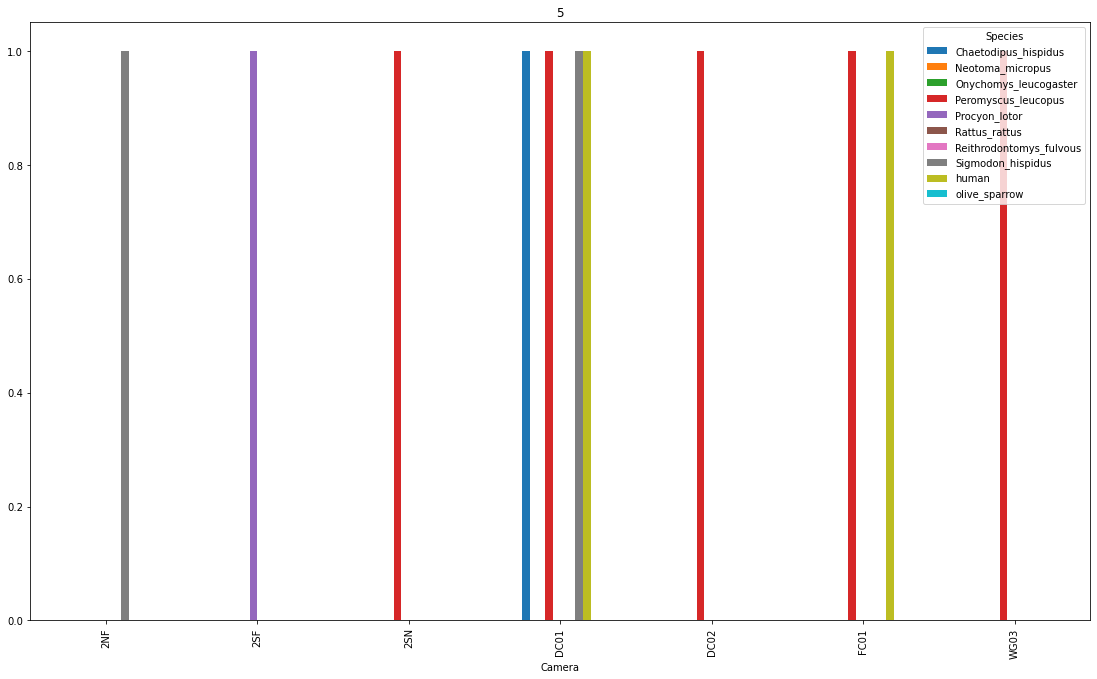

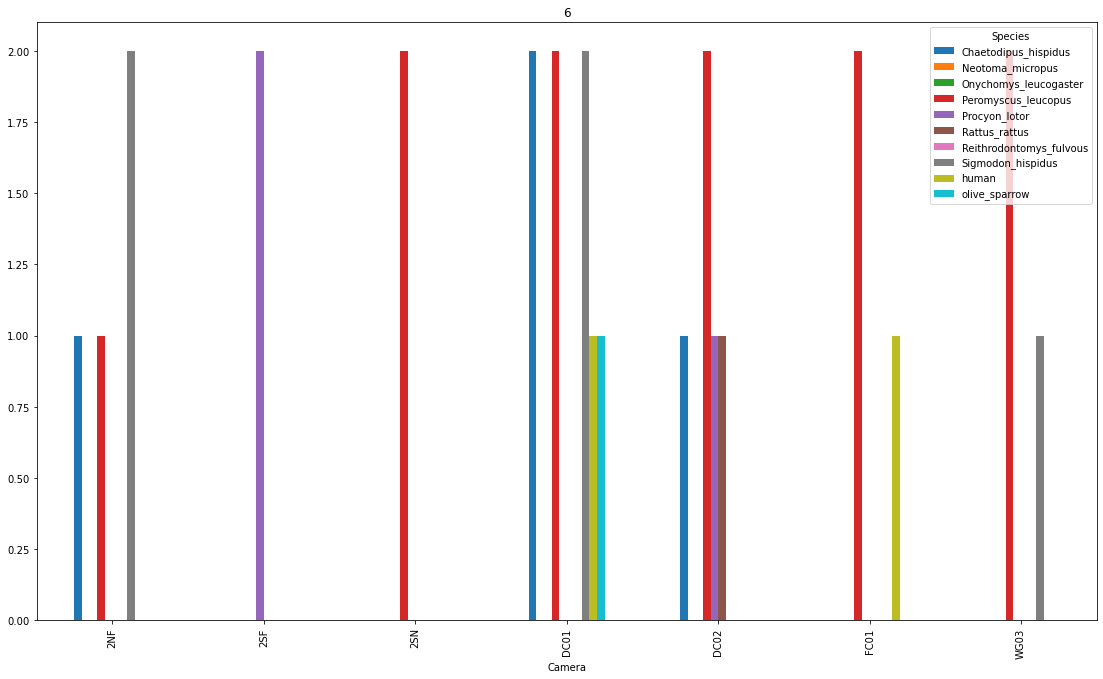

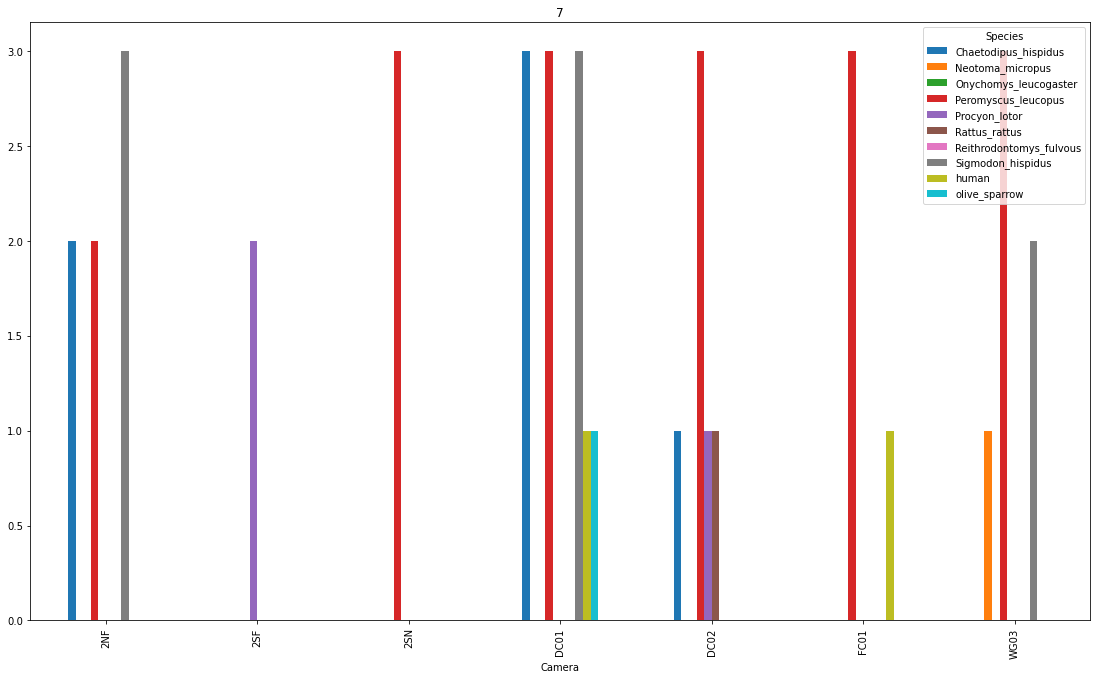

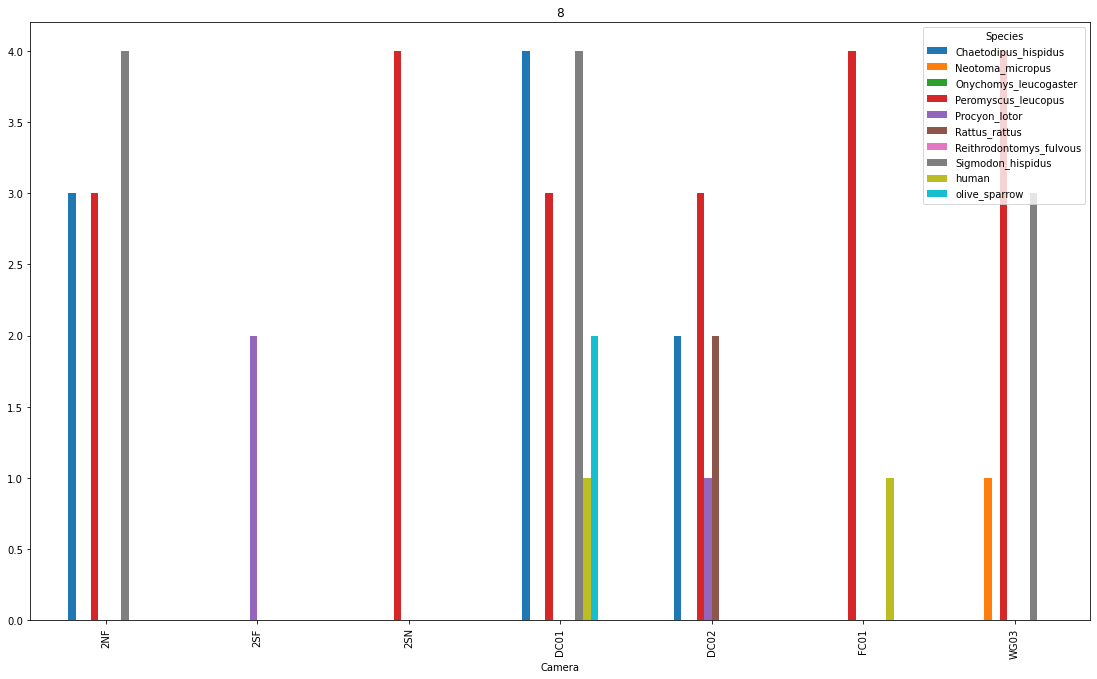

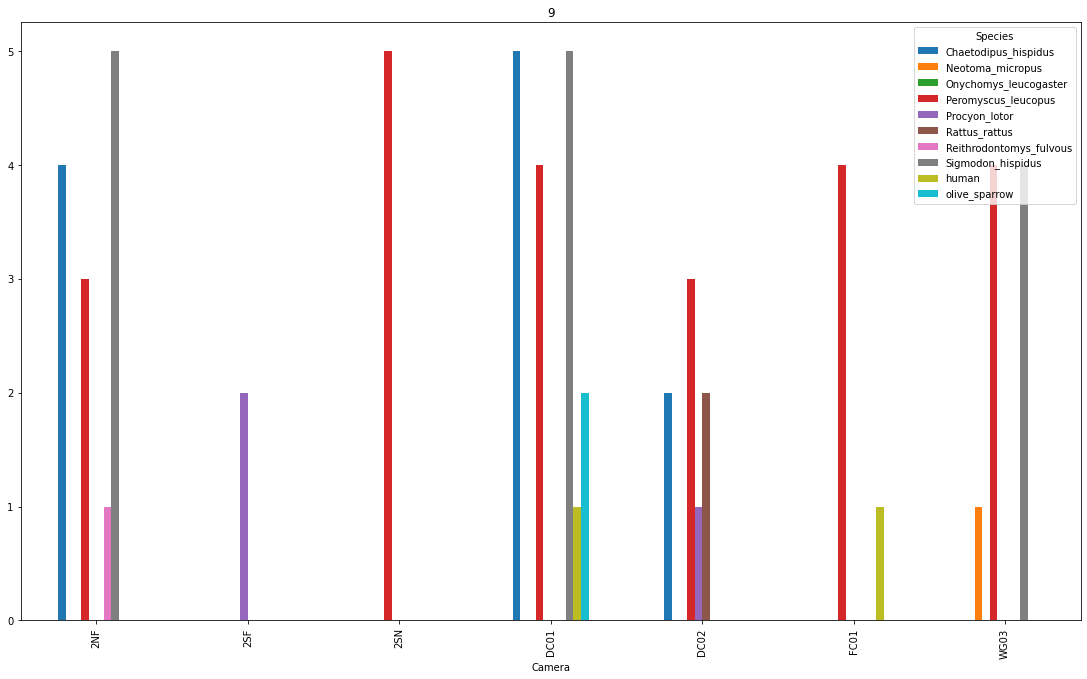

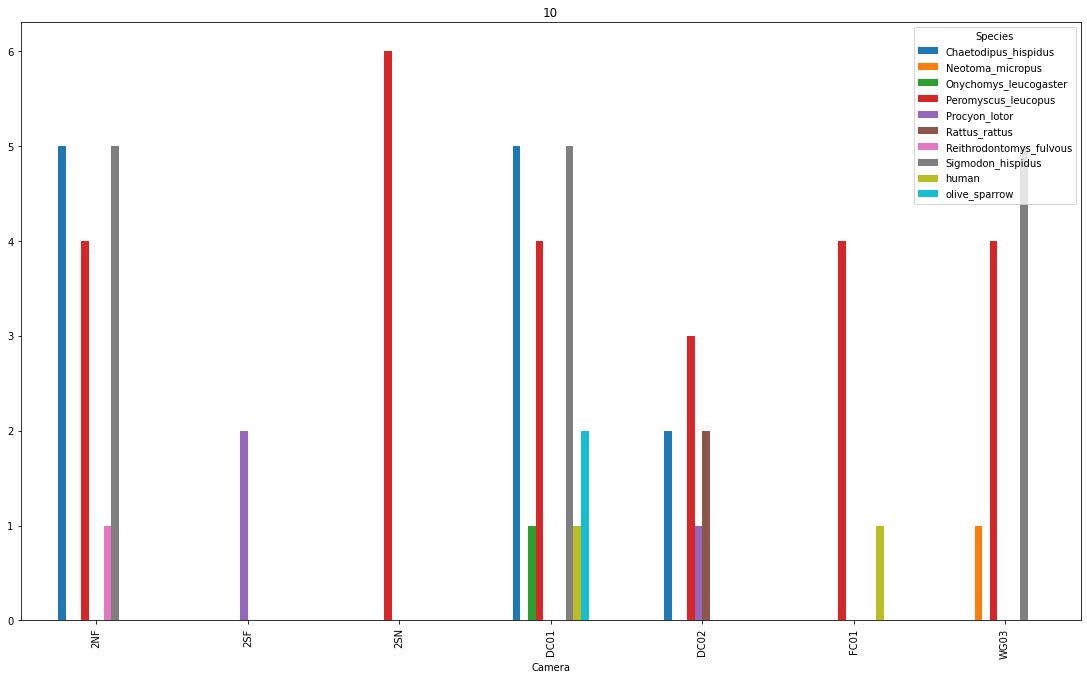

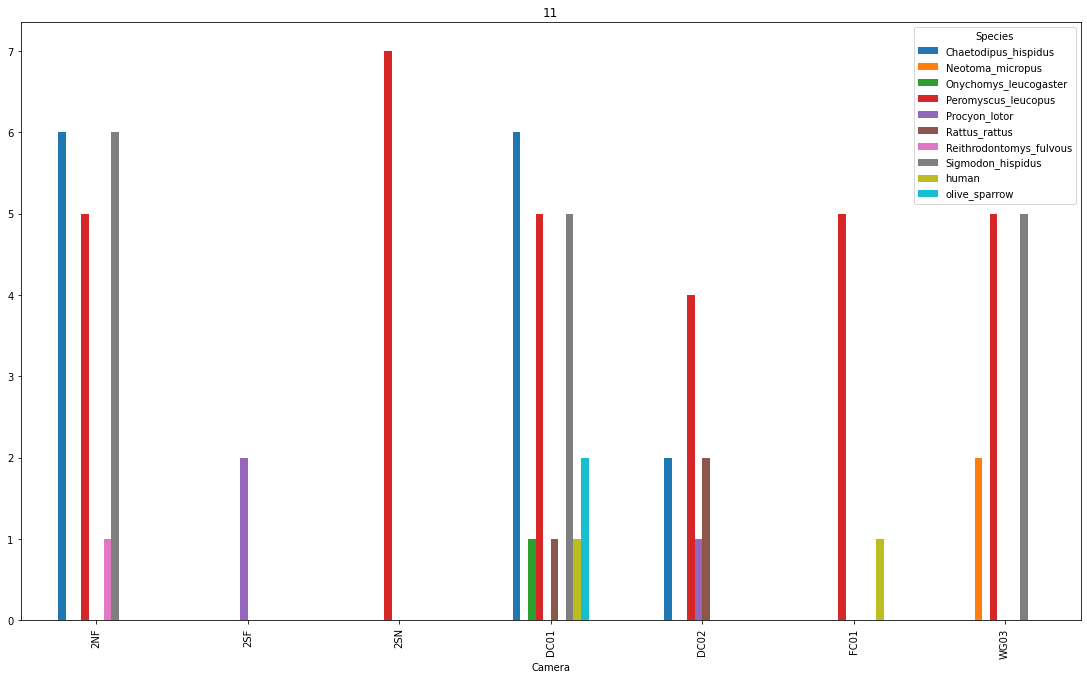

In [164]:
x=5 #first sample day
y=e3_pivot.loc[x,]
n=1 #first plot iteration label
plt.figure(facecolor='yellow')
while x<12:
    y.plot.bar(title=str(x),figsize=(19,11))
    
    plt.savefig('species_presence_'+str(n)+'.png', facecolor='w', edgecolor='w',
        orientation='portrait',  format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1) #saves the fig
    x=x+1 #counter, equal to sample day
    n=n+1 #increases label number for next save file
    y=y+e3_pivot.loc[x,]
    y=y.fillna(0)
    
    
    
    

In [ ]:
x=5 #first sample day
y=e3_pivot.loc[x,]
n=1 #first plot iteration label
while x<12:
    y.plot.bar(title=str(x),figsize=(19,11))
    plt.savefig('species_presence_'+str(n)+'.png') #saves the fig
    x=x+1 #counter, equal to sample day
    n=n+1 #increases label number for next save file
    y=y+e3_pivot.loc[x,]
    y=y.fillna(0)